In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('diamonds.csv')
data.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [4]:
data.drop(['Unnamed: 0'],axis=1)
data.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [5]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)

In [6]:
label_data = data.copy()
s = (data.dtypes =="object")
object_cols = list(s[s].index)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()

for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

Unnamed: 0  carat  cut  color  clarity  depth  table  price     x     y  \
0           1   0.23    2      1        3   61.5   55.0    326  3.95  3.98   
1           2   0.21    3      1        2   59.8   61.0    326  3.89  3.84   
2           3   0.23    1      1        4   56.9   65.0    327  4.05  4.07   
3           4   0.29    3      5        5   62.4   58.0    334  4.20  4.23   
4           5   0.31    1      6        3   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [7]:
corr = label_data.corr()

<Axes: >

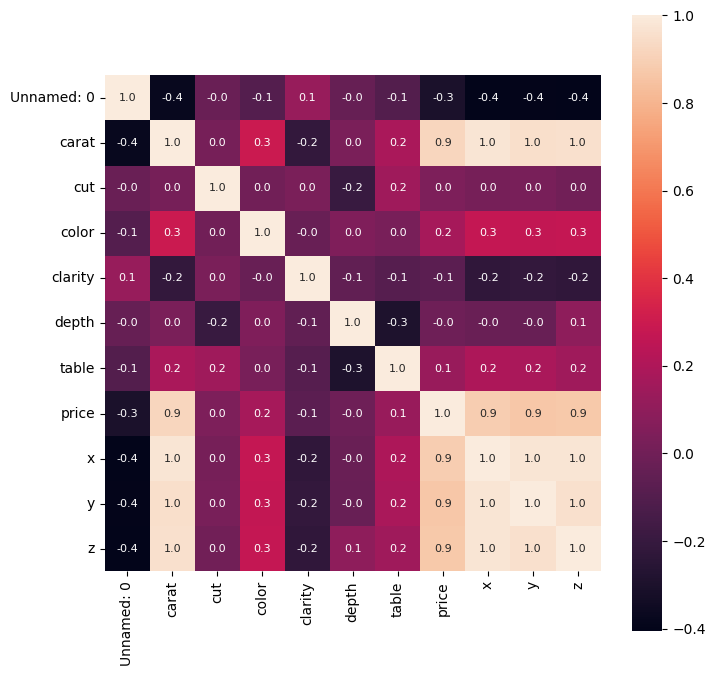

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8})

In [9]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=7)

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
model=Pipeline([("scalar",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])

In [21]:
model.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('rf_classifier', RandomForestRegressor())])

In [25]:
pred = model.predict(X_test)
print("R square", metrics.r2_score(y_test,pred))

R square 0.9999398356507326
